In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import zipfile
import ssl
import certifi
import urllib.request

# Creating SSL context using certifi's CA bundle
ssl_context = ssl.create_default_context(cafile=certifi.where())

# Defining the URL for the file
url = 'https://cdn.upgrad.com/UpGrad/temp/3ba74fb7-bd88-4854-8597-1c225a5aed99/loan.zip'

# Download the file using urllib and the custom SSL context
response = urllib.request.urlopen(url, context=ssl_context)

# Extract the ZIP file and read its contents
with zipfile.ZipFile(io.BytesIO(response.read())) as z:
    # Assuming there is only one file in the ZIP
    file_name = z.namelist()[0]
    with z.open(file_name) as f:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(f, low_memory=False)

# Display the first few rows of the DataFrame
print(df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [76]:
#Verifying the csv file is loaded properly
#Checking No. of Rows and Columns 
df.shape

(39717, 111)

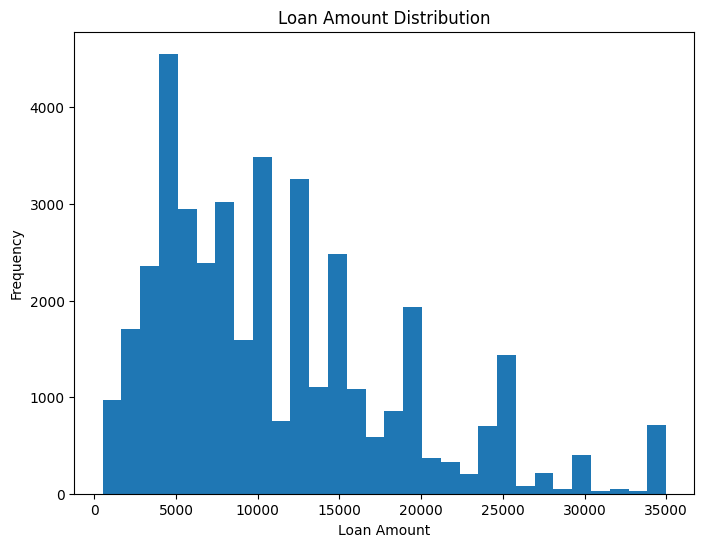

In [10]:
# 3. Histograms
plt.figure(figsize=(8, 6))
plt.hist(loan_data['loan_amnt'], bins=30)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Loan Amount Distribution')
plt.show()

/var/folders/4j/j6r52qd51834l98qf7yxv7780000gn/T/ipykernel_2904/3314859115.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['loan_amnt_bin', 'loan_status']).size().reset_index(name='count')


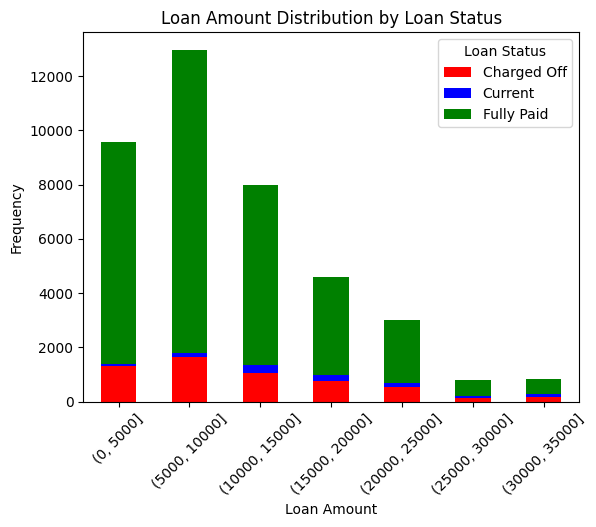

In [11]:
# Creating SSL context using certifi's CA bundle
ssl_context = ssl.create_default_context(cafile=certifi.where())

# Defining the URL for the file
url = 'https://cdn.upgrad.com/UpGrad/temp/3ba74fb7-bd88-4854-8597-1c225a5aed99/loan.zip'

# Download the file using urllib and the custom SSL context
response = urllib.request.urlopen(url, context=ssl_context)

# Extract the ZIP file and read its contents
with zipfile.ZipFile(io.BytesIO(response.read())) as z:
    # Assuming there is only one file in the ZIP
    file_name = z.namelist()[0]
    with z.open(file_name) as f:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(f, low_memory=False)
   
# Create a new column for loan amount in 5000 increments
df['loan_amnt_bin'] = pd.cut(df['loan_amnt'], bins=np.arange(0, df['loan_amnt'].max() + 5000, 5000))

# Group by loan amount bin and loan status
grouped_df = df.groupby(['loan_amnt_bin', 'loan_status']).size().reset_index(name='count')

# Create a pivot table for easier plotting
pivot_df = grouped_df.pivot(index='loan_amnt_bin', columns='loan_status', values='count') 

# Fill missing values with 0
pivot_df = pivot_df.fillna(0) 

# Define colors for each loan status
colors = {'Fully Paid': 'green', 'Charged Off': 'red', 'Current': 'blue'}

# Create the bar chart
pivot_df.plot(kind='bar', stacked=True, color=colors)

# Customize the chart
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Loan Amount Distribution by Loan Status')
plt.xticks(rotation=45) 
plt.legend(title='Loan Status')

plt.show()

/var/folders/4j/j6r52qd51834l98qf7yxv7780000gn/T/ipykernel_2904/116920530.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['loan_amnt_bin', 'loan_status']).size().reset_index(name='count')


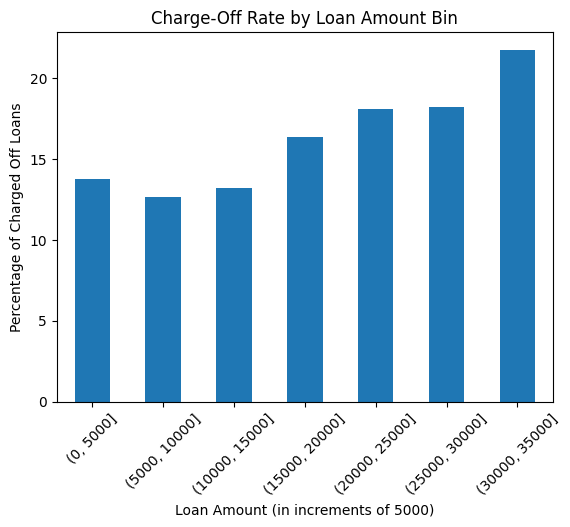

In [12]:
# Create a new column for loan amount in 5000 increments
df['loan_amnt_bin'] = pd.cut(df['loan_amnt'], bins=np.arange(0, df['loan_amnt'].max() + 5000, 5000))

# Group by loan amount bin and loan status
grouped_df = df.groupby(['loan_amnt_bin', 'loan_status']).size().reset_index(name='count')

# Create a pivot table for easier plotting
pivot_df = grouped_df.pivot(index='loan_amnt_bin', columns='loan_status', values='count') 
pivot_df = pivot_df.fillna(0) 

# Calculate the percentage of charged off loans in each bin
pivot_df['Charged_Off_Percent'] = (pivot_df['Charged Off'] / pivot_df.sum(axis=1)) * 100

# Create the bar chart
pivot_df['Charged_Off_Percent'].plot(kind='bar')

# Customize the chart
plt.xlabel('Loan Amount (in increments of 5000)')
plt.ylabel('Percentage of Charged Off Loans')
plt.title('Charge-Off Rate by Loan Amount Bin')
plt.xticks(rotation=45) 

plt.show()

In [34]:
# Verifying duplicate rows in data
df[df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_amnt_bin


In [35]:
#Verifying and dropping the Null columns and rows

print("Null Rows", df.isnull().all(axis=1).sum())
print("Null Columns", df.isnull().all(axis=0).sum())
df.dropna(axis=1,how='all',inplace=True)
df.shape

Null Rows 0
Null Columns 0


(39717, 58)

In [37]:
df.isna().sum()
# Verifying columns
df.columns[df.isnull().any()]

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [36]:
#Dropping columns at least 1 null value
df1 = df.dropna(axis=1)

In [38]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,loan_amnt_bin
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0,"(0, 5000]"
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0,"(0, 5000]"
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0,"(0, 5000]"
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0,"(5000, 10000]"
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,1037.39,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0,"(0, 5000]"


In [39]:
#resorting index
df1 = df1.reindex(sorted(df1.columns), axis=1)
df1

,acc_now_delinq,addr_state,annual_inc,application_type,collection_recovery_fee,delinq_2yrs,delinq_amnt,dti,earliest_cr_line,funded_amnt,...,term,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,url,verification_status,zip_code
0,0,AZ,24000.0,INDIVIDUAL,0.00,0,0,27.65,Jan-85,5000,...,36 months,9,5863.155187,5833.84,863.16,0.00,5000.00,https://lendingclub.com/browse/loanDetail.acti...,Verified,860xx
1,0,GA,30000.0,INDIVIDUAL,1.11,0,0,1.00,Apr-99,2500,...,60 months,4,1008.710000,1008.71,435.17,0.00,456.46,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,309xx
2,0,IL,12252.0,INDIVIDUAL,0.00,0,0,8.72,Nov-01,2400,...,36 months,10,3005.666844,3005.67,605.67,0.00,2400.00,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,606xx
3,0,CA,49200.0,INDIVIDUAL,0.00,0,0,20.00,Feb-96,10000,...,36 months,37,12231.890000,12231.89,2214.92,16.97,10000.00,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,917xx
4,0,OR,80000.0,INDIVIDUAL,0.00,0,0,17.94,Jan-96,3000,...,60 months,38,3513.330000,3513.33,1037.39,0.00,2475.94,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,972xx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,0,CO,110000.0,INDIVIDUAL,0.00,0,0,11.33,Nov-90,2500,...,36 months,40,2822.969293,1213.88,322.97,0.00,2500.00,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,802xx
39713,0,NC,18000.0,INDIVIDUAL,0.00,1,0,6.40,Dec-86,8500,...,36 months,9,9913.491822,1020.51,1413.49,0.00,8500.00,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,274xx
39714,0,MA,100000.0,INDIVIDUAL,0.00,0,0,2.30,Oct-98,5000,...,36 months,20,5272.161128,1397.12,272.16,0.00,5000.00,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,017xx
39715,0,MD,200000.0,INDIVIDUAL,0.00,0,0,3.72,Nov-88,5000,...,36 months,26,5174.198551,672.66,174.20,0.00,5000.00,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,208xx


In [40]:
# Correcting data types
df1 = df1.astype({
    'dti': 'float',
    'loan_amnt' : 'float'
})

In [41]:
# Converting int_rate column to float 
df1['int_rate'] = df1['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

In [42]:
# Rounding  to 2 decimals
for col in ['loan_amnt', 'int_rate', 'dti']:
    df1[col] = df1[col].apply(lambda x: round(x, 2))

In [43]:
df1.dtypes

acc_now_delinq                int64
addr_state                   object
annual_inc                  float64
application_type             object
collection_recovery_fee     float64
delinq_2yrs                   int64
delinq_amnt                   int64
dti                         float64
earliest_cr_line             object
funded_amnt                   int64
funded_amnt_inv             float64
grade                        object
home_ownership               object
id                            int64
initial_list_status          object
inq_last_6mths                int64
installment                 float64
int_rate                    float64
issue_d                      object
last_pymnt_amnt             float64
loan_amnt                   float64
loan_amnt_bin              category
loan_status                  object
member_id                     int64
open_acc                      int64
out_prncp                   float64
out_prncp_inv               float64
policy_code                 

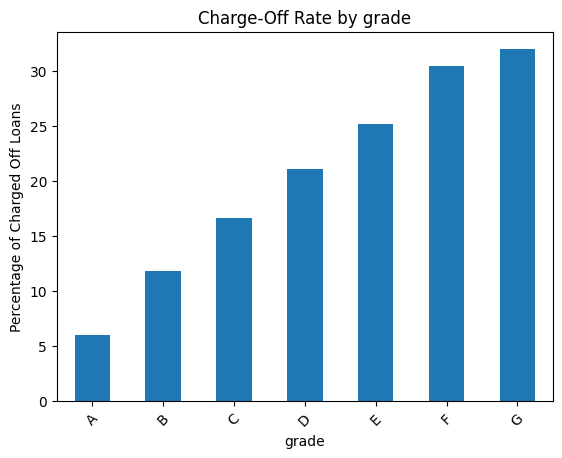

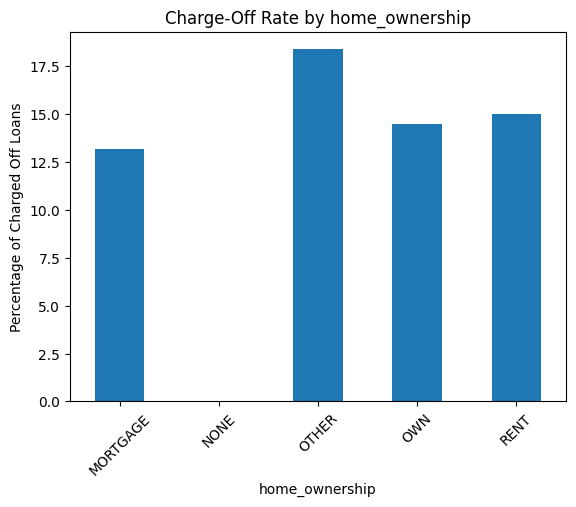

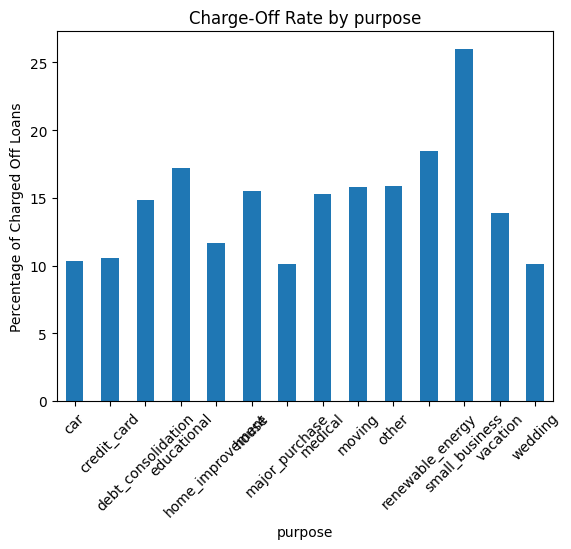

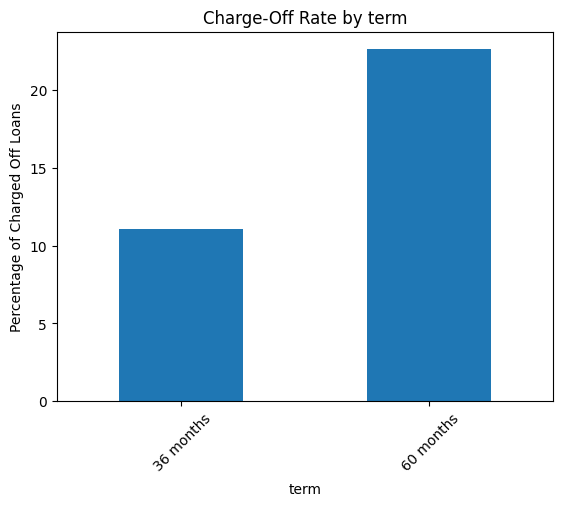

In [44]:
# Function to create bar chart showing the percentage of charged-off loans
def create_charged_off_percent_chart(df1, column_name):
    """
    Creates a bar chart showing the percentage of charged-off loans 
    for a given categorical column.

    Args:
        df1: The pandas DataFrame containing the loan data.
        column_name: The name of the categorical column to analyze 
                      (e.g., 'grade', 'home_ownership', 'emp_length').

    Returns:
        None (displays the chart directly).
    """
    # Group by the specified column and loan status
    grouped_df1 = df1.groupby([column_name, 'loan_status']).size().reset_index(name='count')
    
    # Create a pivot table for easier plotting
    pivot_df1 = grouped_df1.pivot(index=column_name, columns='loan_status', values='count') 
    pivot_df1 = pivot_df1.fillna(0) 

    # Calculate the percentage of charged-off loans
    pivot_df1['Charged_Off_Percent'] = (pivot_df1['Charged Off'] / pivot_df1.sum(axis=1)) * 100

    # Create the bar chart
    pivot_df1['Charged_Off_Percent'].plot(kind='bar')

    # Customize the chart
    plt.xlabel(column_name)
    plt.ylabel('Percentage of Charged Off Loans')
    plt.title(f'Charge-Off Rate by {column_name}')
    plt.xticks(rotation=45) 

    plt.show()

# Define the list of columns to analyze
columns_to_analyze = ['grade', 'home_ownership', 'purpose', 'term', ]



# Create bar charts for each column
for column in columns_to_analyze:
    create_charged_off_percent_chart(df1, column)

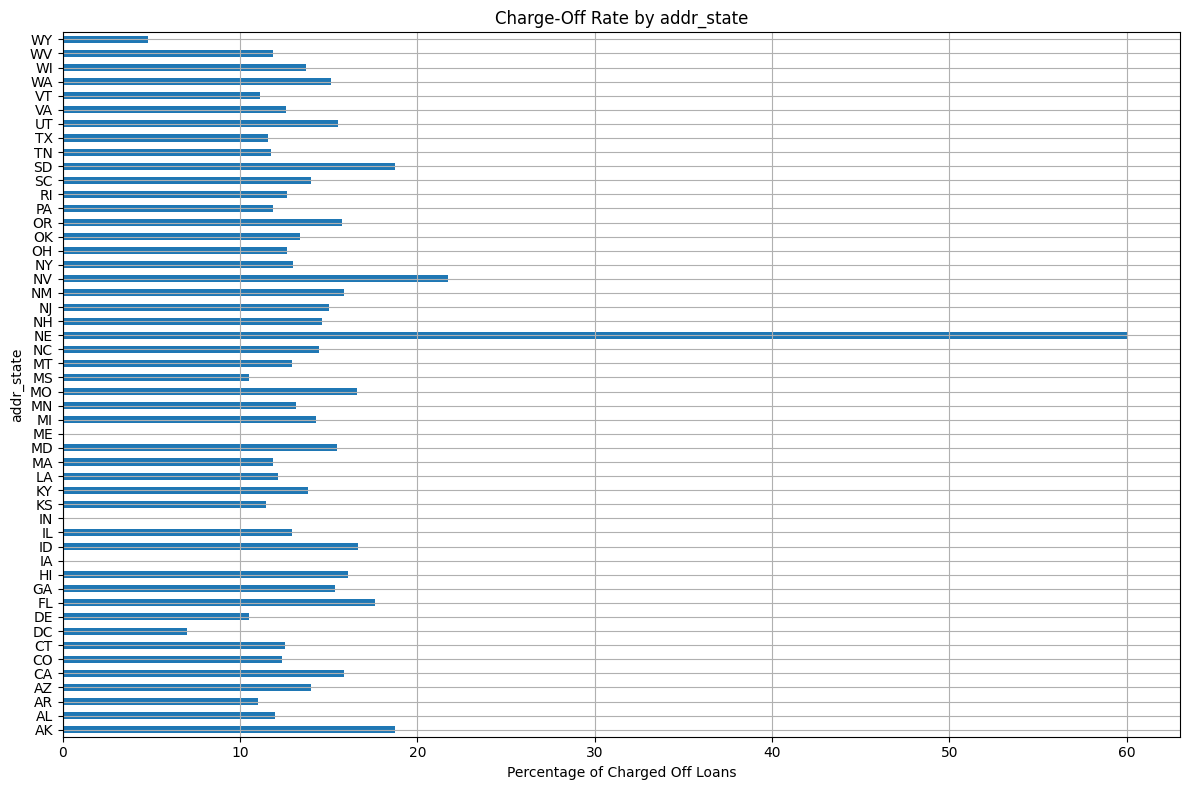

In [45]:
def create_charged_off_percent_chart(df1, column_name):

    # Group by the specified column and loan status
    grouped_df1 = df1.groupby([column_name, 'loan_status'], observed=False).size().reset_index(name='count')
    
    # Create a pivot table for easier plotting
    pivot_df1 = grouped_df1.pivot(index=column_name, columns='loan_status', values='count') 
    pivot_df1 = pivot_df1.fillna(0) 

    # Calculate the percentage of charged off loans
    pivot_df1['Charged_Off_Percent'] = (pivot_df1['Charged Off'] / pivot_df1.sum(axis=1)) * 100

    # Create the bar chart
    plt.figure(figsize=(12, 8))  # Increased figure size
    pivot_df1['Charged_Off_Percent'].plot(kind='barh')  # Horizontal bar chart

    # Customize the chart
    plt.xlabel('Percentage of Charged Off Loans')
    plt.ylabel(column_name)
    plt.title(f'Charge-Off Rate by {column_name}')
    
    # Show grid for better readability
    plt.grid(True)

    plt.tight_layout()  # Ensure labels fit inside the figure

    plt.show()

# Create the chart specifically for 'addr_state'
create_charged_off_percent_chart(df1, 'addr_state')

In [46]:
# Filter the DataFrame for loans in Nebraska (NE)
ne_loans = df[df['addr_state'] == 'NE']

# Count the number of loans
num_ne_loans = ne_loans.shape[0]

print(f"Number of loans given out in Nebraska (NE): {num_ne_loans}")

Number of loans given out in Nebraska (NE): 5


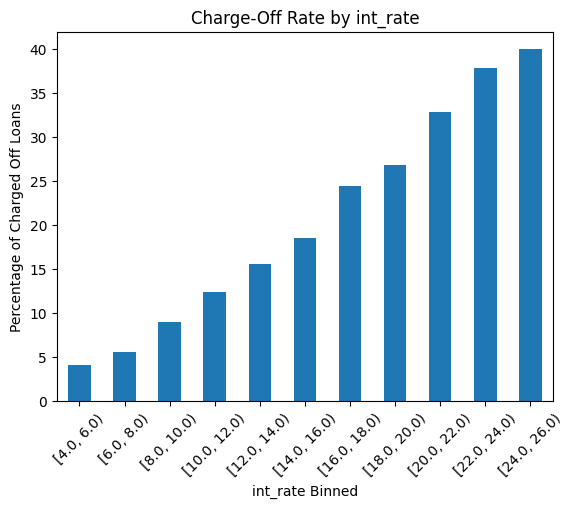

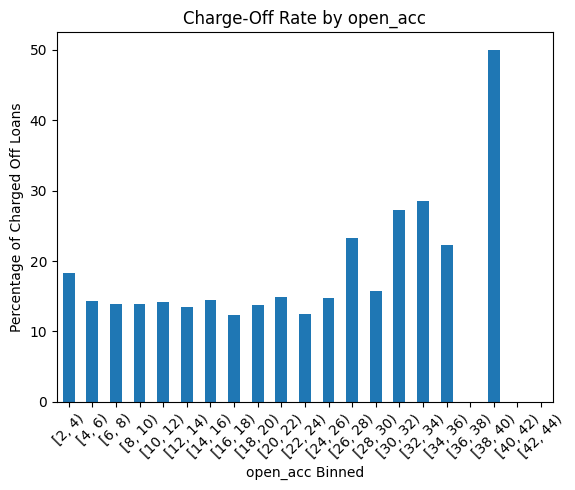

In [47]:
# Function to create bar chart showing the percentage of charged-off loans
def create_charged_off_percent_chart(df1, column_name, bin_width=2):

    # Bin the int_rate column into intervals of bin_width (default is 5%)
    bins = np.arange(0, df1[column_name].max() + bin_width, bin_width)
    df1[column_name + '_binned'] = pd.cut(df1[column_name], bins=bins, include_lowest=True, right=False)

    # Group by the binned column and loan status
    #grouped_df1 = df1.groupby([column_name + '_binned', 'loan_status']).size().reset_index(name='count')
    grouped_df1 = df1.groupby([column_name + '_binned', 'loan_status'], observed=True).size().reset_index(name='count')

    # Create a pivot table for easier plotting
    pivot_df1 = grouped_df1.pivot(index=column_name + '_binned', columns='loan_status', values='count') 
    pivot_df1 = pivot_df1.fillna(0)

    # Calculate the percentage of charged-off loans
    pivot_df1['Charged_Off_Percent'] = (pivot_df1['Charged Off'] / pivot_df1.sum(axis=1)) * 100

    # Create the bar chart
    pivot_df1['Charged_Off_Percent'].plot(kind='bar')

    # Customize the chart
    plt.xlabel(f'{column_name} Binned')
    plt.ylabel('Percentage of Charged Off Loans')
    plt.title(f'Charge-Off Rate by {column_name}')
    plt.xticks(rotation=45)

    plt.show()

# Define the list of columns to analyze
columns_to_analyze = ['int_rate','open_acc']

# Create bar charts for each column
for column in columns_to_analyze:
    create_charged_off_percent_chart(df1, column)


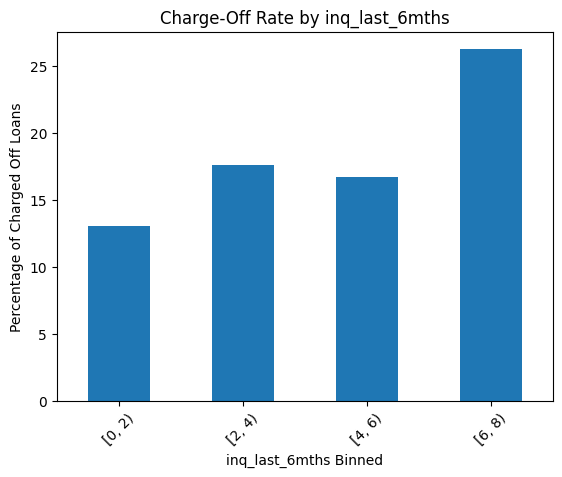

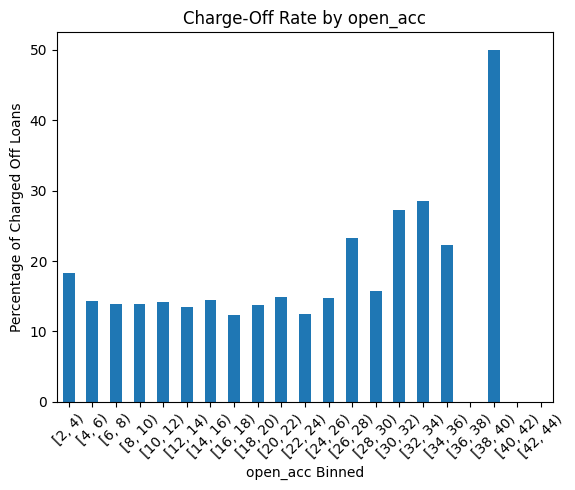

In [48]:
# Function to create bar chart showing the percentage of charged-off loans
def create_charged_off_percent_chart(df1, column_name, bin_width=2):

    # Bin the int_rate column into intervals of bin_width (default is 5%)
    bins = np.arange(0, df1[column_name].max() + bin_width, bin_width)
    df1[column_name + '_binned'] = pd.cut(df1[column_name], bins=bins, include_lowest=True, right=False)

    # Group by the binned column and loan status
    #grouped_df1 = df1.groupby([column_name + '_binned', 'loan_status']).size().reset_index(name='count')
    grouped_df1 = df1.groupby([column_name + '_binned', 'loan_status'], observed=True).size().reset_index(name='count')

    # Create a pivot table for easier plotting
    pivot_df1 = grouped_df1.pivot(index=column_name + '_binned', columns='loan_status', values='count') 
    pivot_df1 = pivot_df1.fillna(0)

    # Calculate the percentage of charged-off loans
    pivot_df1['Charged_Off_Percent'] = (pivot_df1['Charged Off'] / pivot_df1.sum(axis=1)) * 100

    # Create the bar chart
    pivot_df1['Charged_Off_Percent'].plot(kind='bar')

    # Customize the chart
    plt.xlabel(f'{column_name} Binned')
    plt.ylabel('Percentage of Charged Off Loans')
    plt.title(f'Charge-Off Rate by {column_name}')
    plt.xticks(rotation=45)

    plt.show()

# Define the list of columns to analyze
columns_to_analyze = ['inq_last_6mths', 'open_acc' ]

# Create bar charts for each column
for column in columns_to_analyze:
    create_charged_off_percent_chart(df1, column)

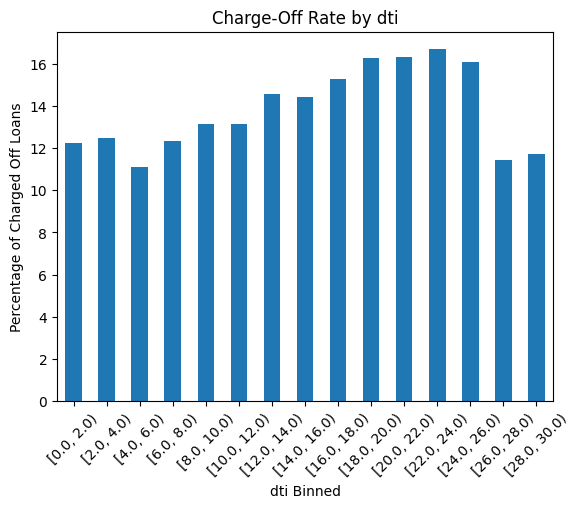

In [49]:
# Function to create bar chart showing the percentage of charged-off loans
def create_charged_off_percent_chart(df1, column_name, bin_width=2):

    # Bin the int_rate column into intervals of bin_width (default is 5%)
    bins = np.arange(0, df1[column_name].max() + bin_width, bin_width)
    df1[column_name + '_binned'] = pd.cut(df1[column_name], bins=bins, include_lowest=True, right=False)

    # Group by the binned column and loan status
    #grouped_df1 = df1.groupby([column_name + '_binned', 'loan_status']).size().reset_index(name='count')
    grouped_df1 = df1.groupby([column_name + '_binned', 'loan_status'], observed=True).size().reset_index(name='count')

    # Create a pivot table for easier plotting
    pivot_df1 = grouped_df1.pivot(index=column_name + '_binned', columns='loan_status', values='count') 
    pivot_df1 = pivot_df1.fillna(0)

    # Calculate the percentage of charged-off loans
    pivot_df1['Charged_Off_Percent'] = (pivot_df1['Charged Off'] / pivot_df1.sum(axis=1)) * 100

    # Create the bar chart
    pivot_df1['Charged_Off_Percent'].plot(kind='bar')

    # Customize the chart
    plt.xlabel(f'{column_name} Binned')
    plt.ylabel('Percentage of Charged Off Loans')
    plt.title(f'Charge-Off Rate by {column_name}')
    plt.xticks(rotation=45)

    plt.show()

# Define the list of columns to analyzeemp_length
columns_to_analyze = ['dti']

# Create bar charts for each column
for column in columns_to_analyze:
    create_charged_off_percent_chart(df1, column)

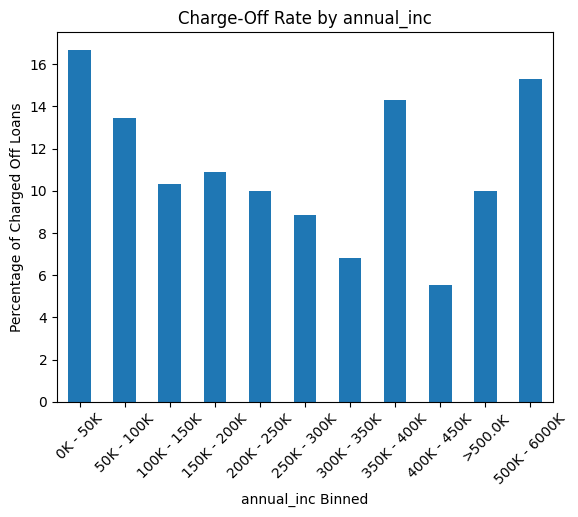

In [105]:
# Function to create bar chart showing the percentage of charged-off loans
def create_charged_off_percent_chart(df1, column_name, bin_width=50000, special_bin_threshold=500000):
    # Define bins with a special bin for values greater than 500,000
    bins = np.arange(0, special_bin_threshold, bin_width)
    bins = np.append(bins, [special_bin_threshold, df1[column_name].max() + 1])  # Adding >500,000 as a separate bin

    # Bin the column into intervals based on the defined bins
    df1[column_name + '_binned'] = pd.cut(df1[column_name], bins=bins, include_lowest=True, right=False)

    # Group by the binned column and loan status
    grouped_df1 = df1.groupby([column_name + '_binned', 'loan_status'], observed=True).size().reset_index(name='count')

    # Create a pivot table for easier plotting
    pivot_df1 = grouped_df1.pivot(index=column_name + '_binned', columns='loan_status', values='count') 
    pivot_df1 = pivot_df1.fillna(0)

    # Calculate the percentage of charged-off loans
    pivot_df1['Charged_Off_Percent'] = (pivot_df1['Charged Off'] / pivot_df1.sum(axis=1)) * 100

    # Create readable bin labels
    def custom_bin_label(bin):
        # If the bin is the special bin (for values >500,000)
        if bin.right == special_bin_threshold:
            return f'>{special_bin_threshold/1000}K'
        # Convert bin ranges to labels in the form of '50K', '100K', etc.
        left = int(bin.left / 1000)  # Convert to K
        right = int(bin.right / 1000)  # Convert to K
        if left == right:
            return f'{left}K'
        return f'{left}K - {right}K'

    # Assign custom labels to the bins
    df1[column_name + '_binned_label'] = df1[column_name + '_binned'].apply(custom_bin_label)

    # Update x-axis labels to reflect the new bin labels
    grouped_df1 = df1.groupby([column_name + '_binned_label', 'loan_status'], observed=True).size().reset_index(name='count')
    pivot_df1 = grouped_df1.pivot(index=column_name + '_binned_label', columns='loan_status', values='count')
    pivot_df1 = pivot_df1.fillna(0)

    # Calculate the percentage of charged-off loans
    pivot_df1['Charged_Off_Percent'] = (pivot_df1['Charged Off'] / pivot_df1.sum(axis=1)) * 100

    # Create the bar chart
    pivot_df1['Charged_Off_Percent'].plot(kind='bar')

    # Customize the chart
    plt.xlabel(f'{column_name} Binned')
    plt.ylabel('Percentage of Charged Off Loans')
    plt.title(f'Charge-Off Rate by {column_name}')
    plt.xticks(rotation=45)

    plt.show()

# Define the list of columns to analyze
columns_to_analyze = ['annual_inc']

# Create bar charts for each column
for column in columns_to_analyze:
    create_charged_off_percent_chart(df1, column)


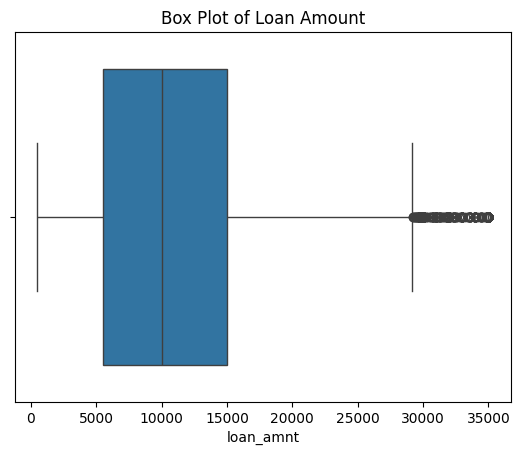

In [113]:
sns.boxplot(x=df1['loan_amnt'])
plt.title('Box Plot of Loan Amount')
plt.show()

/var/folders/4j/j6r52qd51834l98qf7yxv7780000gn/T/ipykernel_1233/51782961.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1['loan_amnt'], shade=True)


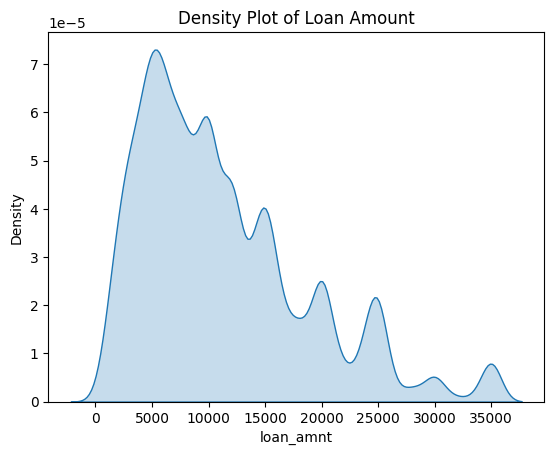

In [114]:
sns.kdeplot(df1['loan_amnt'], shade=True)
plt.title('Density Plot of Loan Amount')
plt.show()

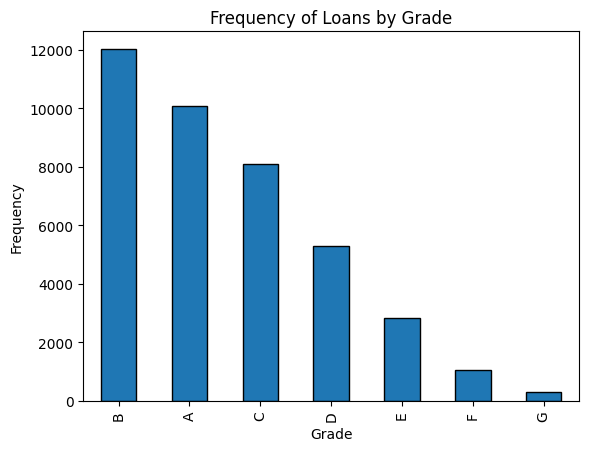

In [117]:
df1['grade'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Frequency of Loans by Grade')
plt.show()

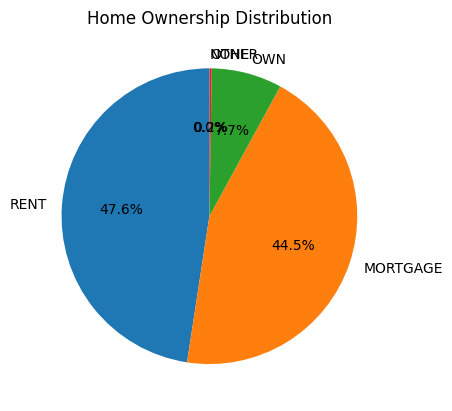

In [118]:
df['home_ownership'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Home Ownership Distribution')
plt.ylabel('')  # To remove the ylabel
plt.show()

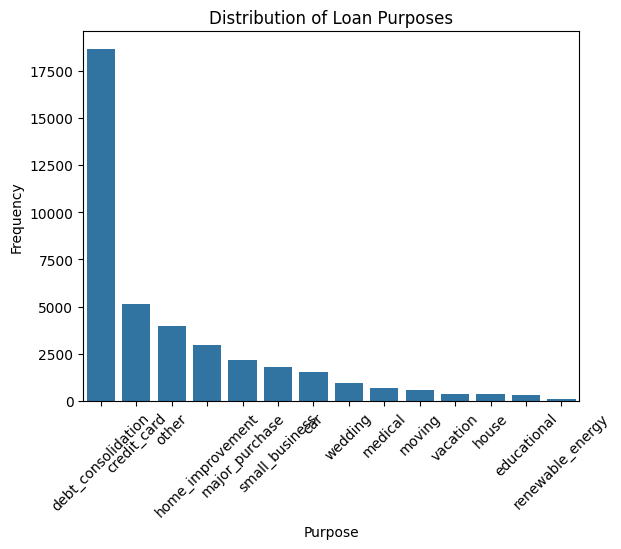

In [119]:
sns.barplot(x=df1['purpose'].value_counts().index, y=df1['purpose'].value_counts().values)
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Purposes')
plt.xticks(rotation=45)
plt.show()

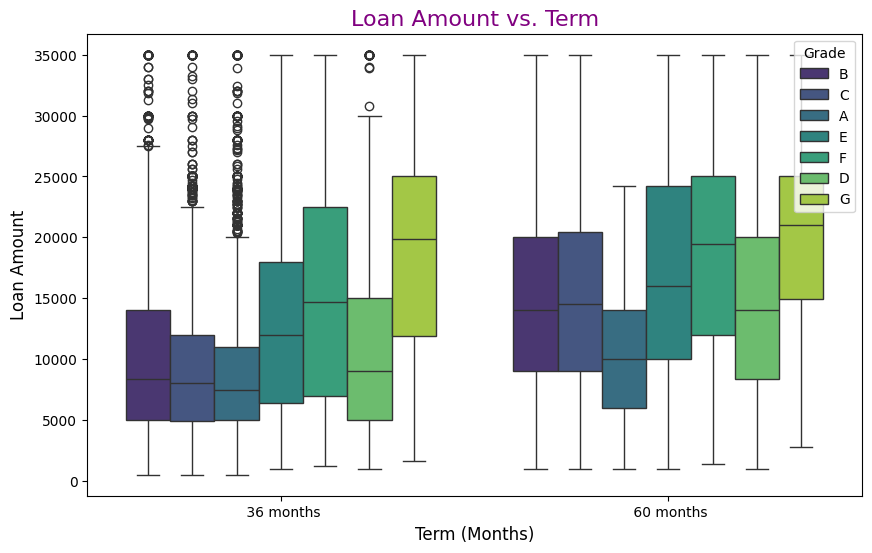

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='term', y='loan_amnt', hue='grade', data=df1, palette='viridis')
plt.title('Loan Amount vs. Term', fontsize=16, color='purple')
plt.xlabel('Term (Months)', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)
plt.legend(title='Grade', loc='upper right')
plt.show()

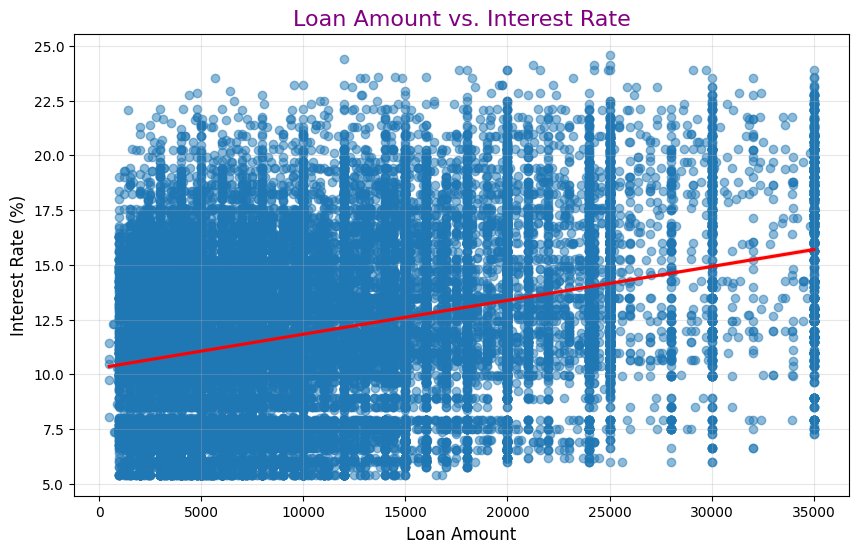

In [66]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot with regression line
sns.regplot(x='loan_amnt', y='int_rate', data=df1, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Customize the plot
plt.title('Loan Amount vs. Interest Rate', fontsize=16, color='purple')
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Interest Rate (%)', fontsize=12)
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()


/var/folders/4j/j6r52qd51834l98qf7yxv7780000gn/T/ipykernel_2904/4092932048.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='home_ownership', y='annual_inc', data=df1, palette='viridis', inner='quartile', scale='count')
/var/folders/4j/j6r52qd51834l98qf7yxv7780000gn/T/ipykernel_2904/4092932048.py:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='home_ownership', y='annual_inc', data=df1, palette='viridis', inner='quartile', scale='count')


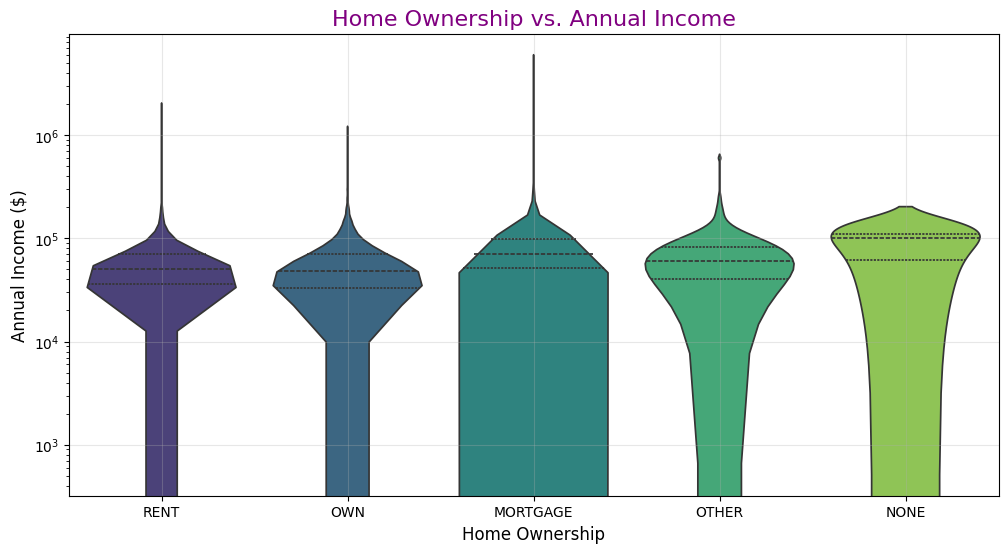

In [70]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a violin plot
sns.violinplot(x='home_ownership', y='annual_inc', data=df1, palette='viridis', inner='quartile', scale='count')

# Customize the plot
plt.title('Home Ownership vs. Annual Income', fontsize=16, color='purple')
plt.xlabel('Home Ownership', fontsize=12)
plt.ylabel('Annual Income ($)', fontsize=12)
plt.yscale('log')  # Log scale to handle skewness in income data
plt.xticks(fontsize=10)
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

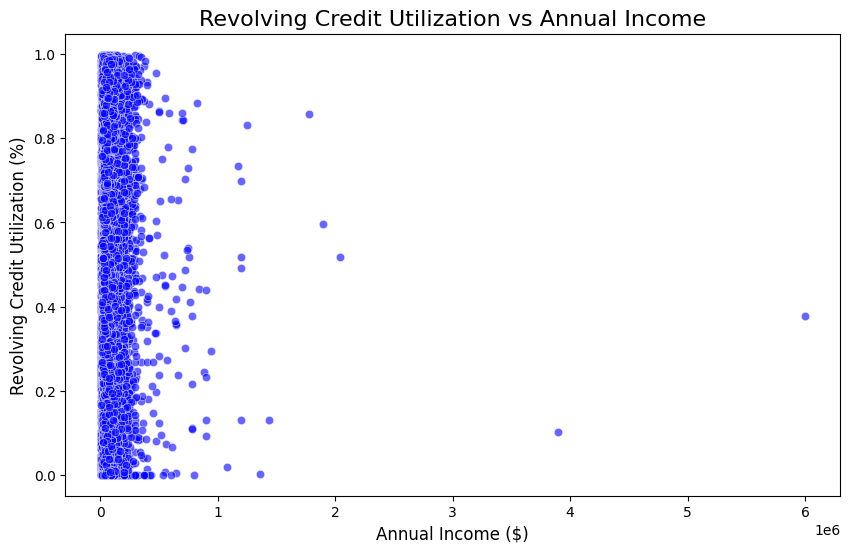

In [73]:
# Remove the '%' sign and convert to float
df1['revol_util'] = df['revol_util'].str.rstrip('%').astype(float) / 100


# Scatter plot of revol_util vs annual_inc
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='revol_util', data=df1, color='b', alpha=0.6)

# Adding titles and labels
plt.title('Revolving Credit Utilization vs Annual Income', fontsize=16)
plt.xlabel('Annual Income ($)', fontsize=12)
plt.ylabel('Revolving Credit Utilization (%)', fontsize=12)

# Show the plot
plt.show()


/var/folders/4j/j6r52qd51834l98qf7yxv7780000gn/T/ipykernel_2904/3071598397.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income_group', y='revol_util', data=df1, palette='viridis')


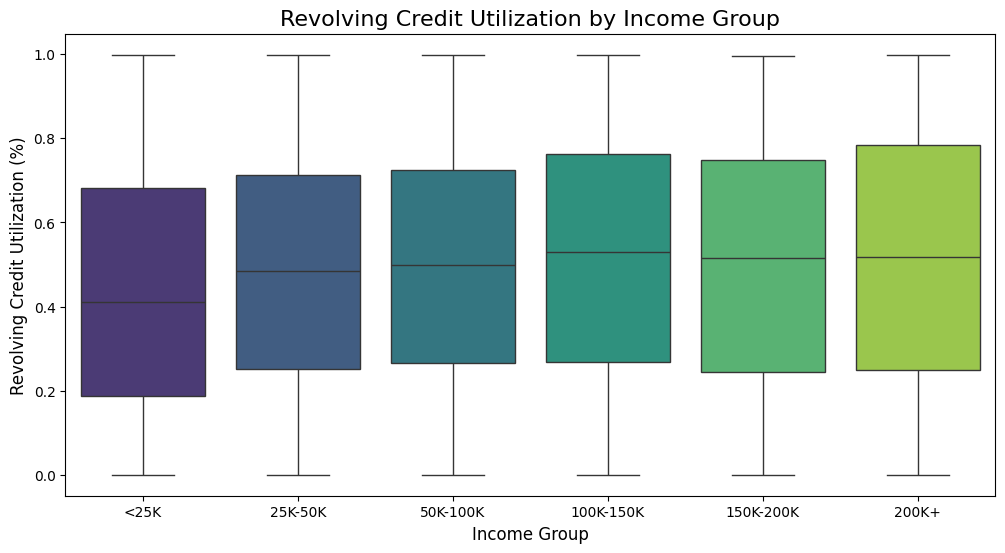

In [74]:
# You can bin the income into categories if needed, here we create bins for demonstration
income_bins = [0, 25000, 50000, 100000, 150000, 200000, float('inf')]
income_labels = ['<25K', '25K-50K', '50K-100K', '100K-150K', '150K-200K', '200K+']
df1['income_group'] = pd.cut(df1['annual_inc'], bins=income_bins, labels=income_labels)

# Box plot of revol_util vs income_group
plt.figure(figsize=(12, 6))
sns.boxplot(x='income_group', y='revol_util', data=df1, palette='viridis')

# Adding titles and labels
plt.title('Revolving Credit Utilization by Income Group', fontsize=16)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Revolving Credit Utilization (%)', fontsize=12)

# Show the plot
plt.show()

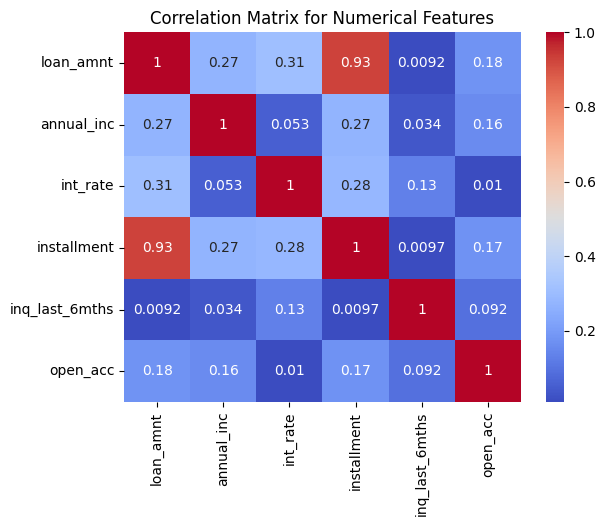

In [50]:
correlation_matrix = df1[['loan_amnt', 'annual_inc', 'int_rate', 'installment', 'inq_last_6mths','open_acc']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/4j/j6r52qd51834l98qf7yxv7780000gn/T/ipykernel_2904/2582768509.py:2: SyntaxWarning: invalid escape sequence '\d'
  df1['term_numeric'] = df1['term'].str.extract('(\d+)').astype(int)


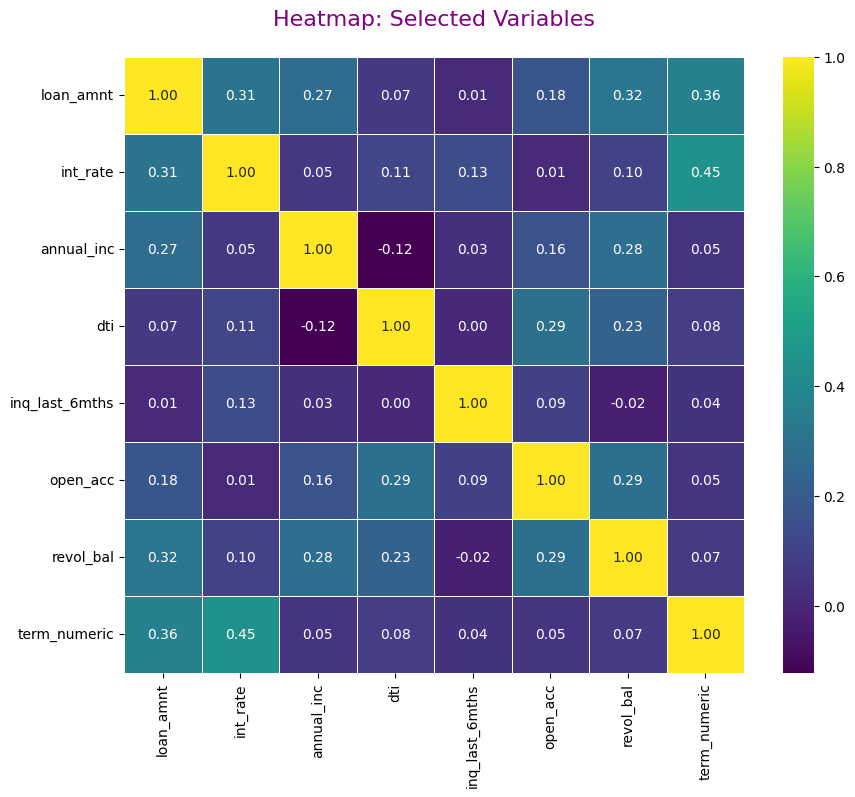

In [63]:
# Map 'term' to numeric values
df1['term_numeric'] = df1['term'].str.extract('(\d+)').astype(int)

# List of variables to restrict the heatmap (use 'term_numeric' instead of 'term')
selected_variables = ['loan_amnt', 'int_rate', 
                      'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'revol_bal', 'term_numeric']

# Filter the correlation table to include only the selected variables
restricted_corr_table = df1[selected_variables].corr()

# Plotting the heatmap
plt.figure(figsize=[10, 8])  # Adjust the figure size as needed
plt.title('Heatmap: Selected Variables\n', fontdict={'fontsize': 16, 'color': 'purple'})
sns.heatmap(restricted_corr_table, cmap='viridis', annot=True, fmt=".2f", linewidths=0.5)
plt.show()